In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ocd_df = pd.read_csv('../ocd_patient_data/ocd_patient_dataset.csv')

In [3]:
ocd_df

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,Male,Hispanic,Divorced,College Degree,2019-01-10,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI
1496,5013,19,Female,Hispanic,Divorced,Graduate Degree,2022-09-14,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,None,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine
1498,3808,37,Female,Caucasian,Married,Some College,2018-04-14,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine


In [4]:
summary_stats = ocd_df.describe()
summary_stats

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,5541.254000,46.781333,121.745333,20.048000,19.62600
std,2562.389469,16.830321,67.404610,11.823884,11.78287
min,1017.000000,18.000000,6.000000,0.000000,0.00000
25%,3338.000000,32.000000,64.000000,10.000000,9.00000
50%,5539.500000,47.000000,121.000000,20.000000,20.00000
75%,7745.500000,61.000000,178.000000,31.000000,29.00000
max,9995.000000,75.000000,240.000000,40.000000,40.00000


### EDA

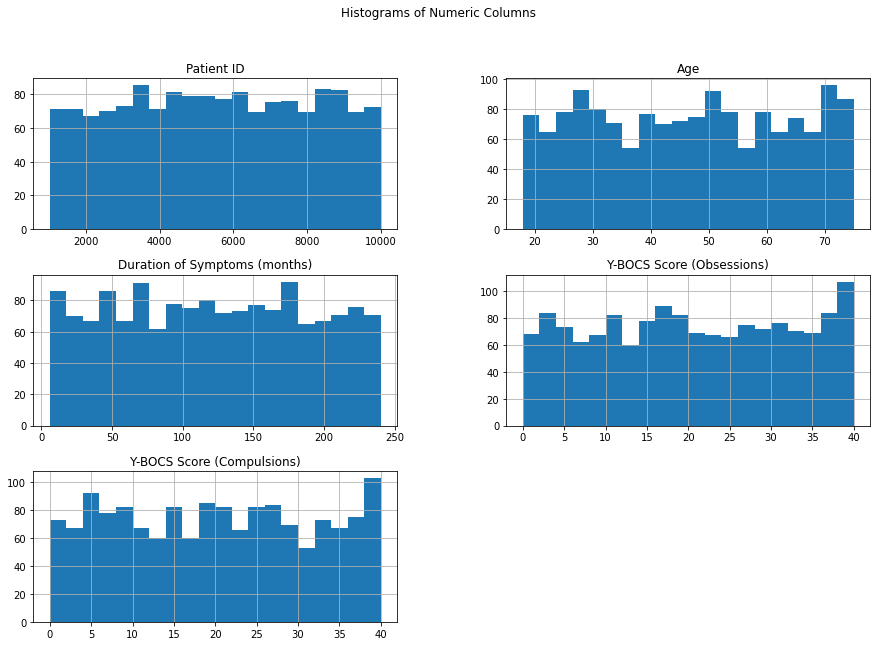

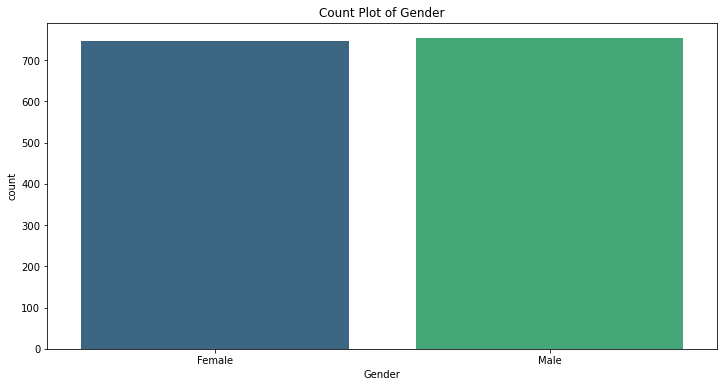

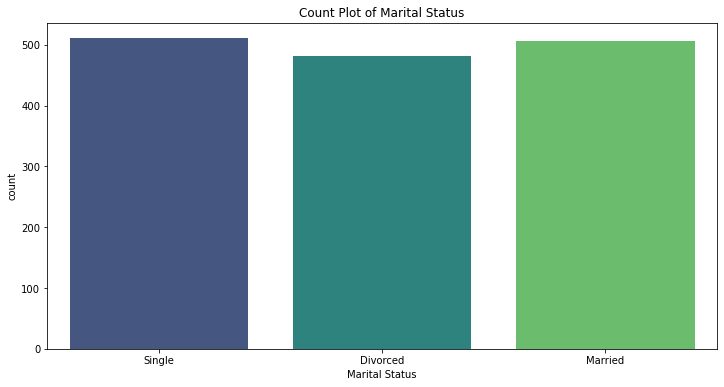

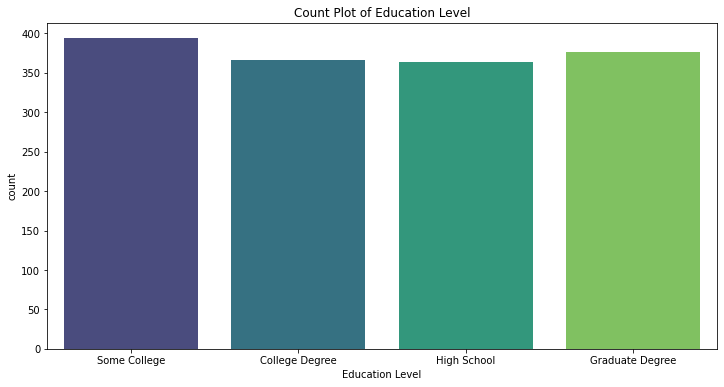

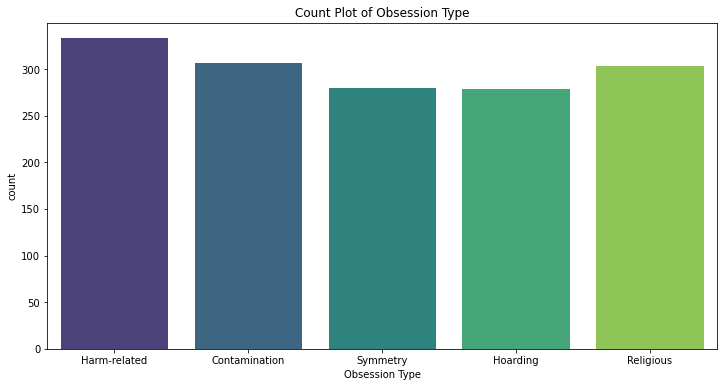

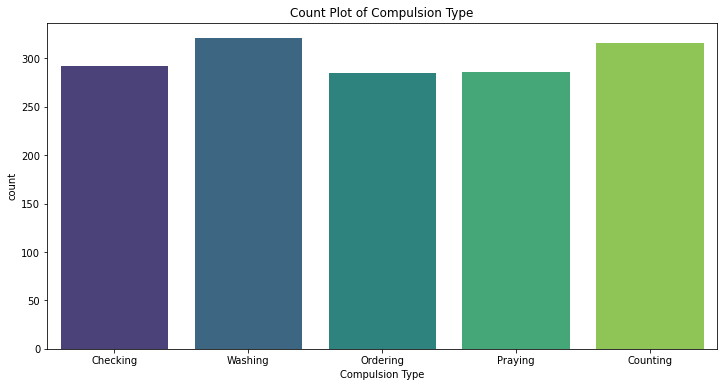

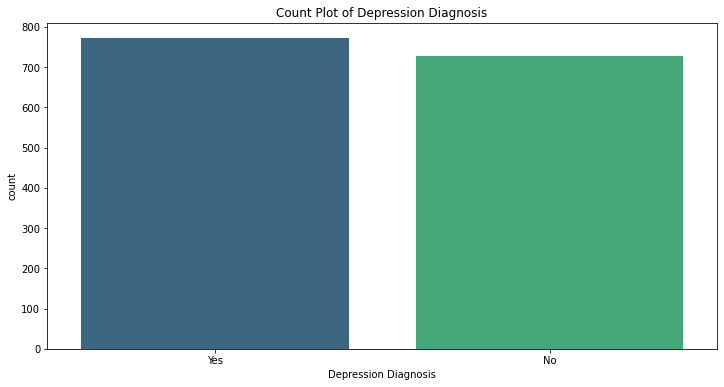

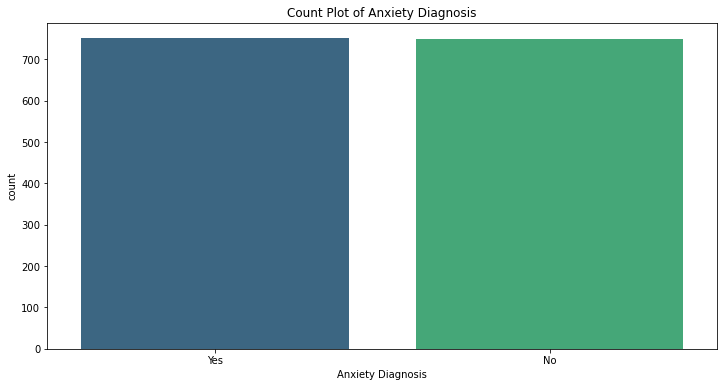

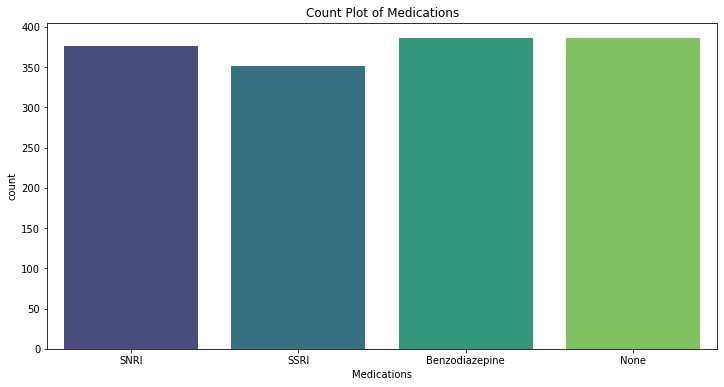

C:\Users\alecb\AppData\Local\Temp\ipykernel_19192\1655696794.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ocd_df.corr()


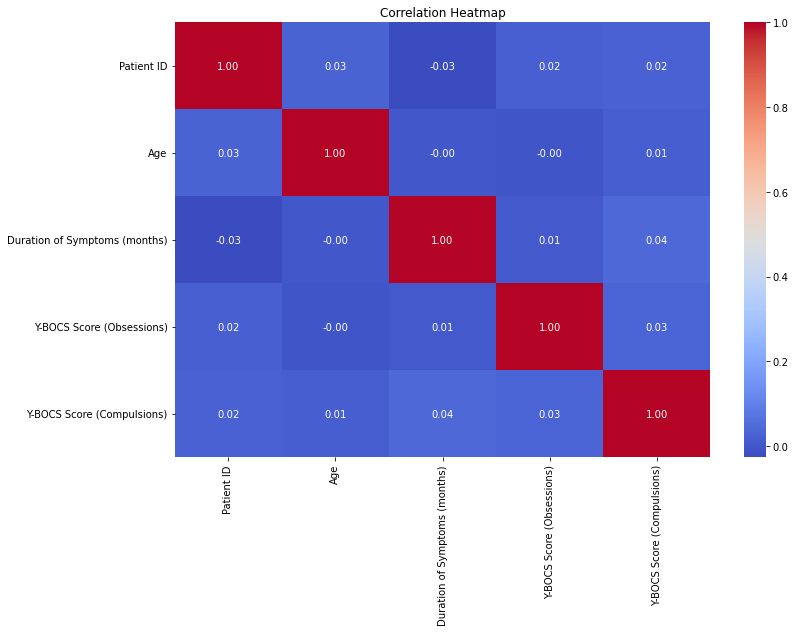

In [5]:
ocd_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

# Plot a count plot for categorical columns
categorical_columns = ['Gender', 'Marital Status', 'Education Level', 'Obsession Type', 'Compulsion Type', 'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications']
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=ocd_df, palette='viridis')
    plt.title(f'Count Plot of {column}')
    plt.show()


# Calculate correlation matrix
correlation_matrix = ocd_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Age Distribution by Gender

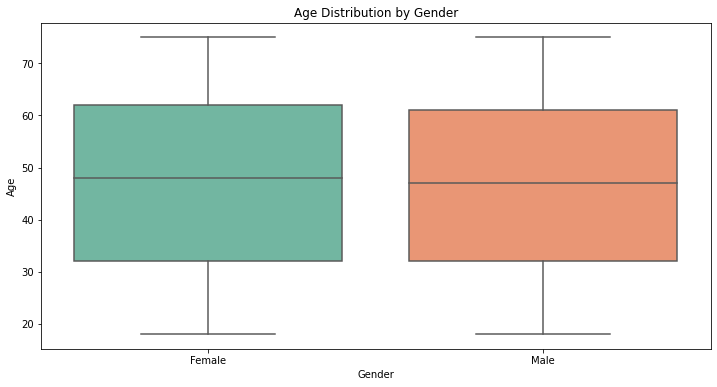

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Age', data=ocd_df, palette='Set2')
plt.title('Age Distribution by Gender')
plt.show()

### Obsession and Compulsion Types

Need to move label<br>
Change y-axis to percent

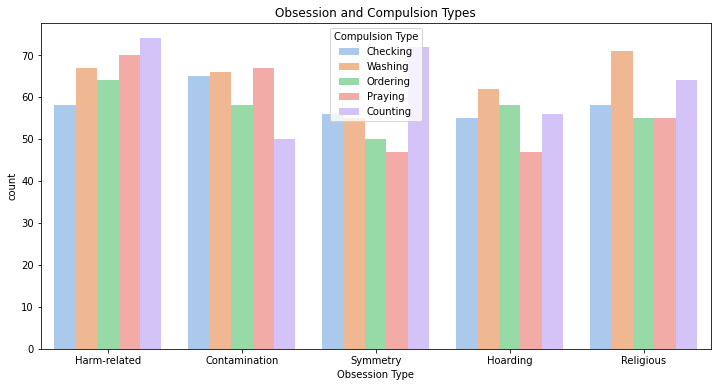

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Obsession Type', hue='Compulsion Type', data=ocd_df, palette='pastel')
plt.title('Obsession and Compulsion Types')
plt.show()

### Duration of Symptoms Histogram

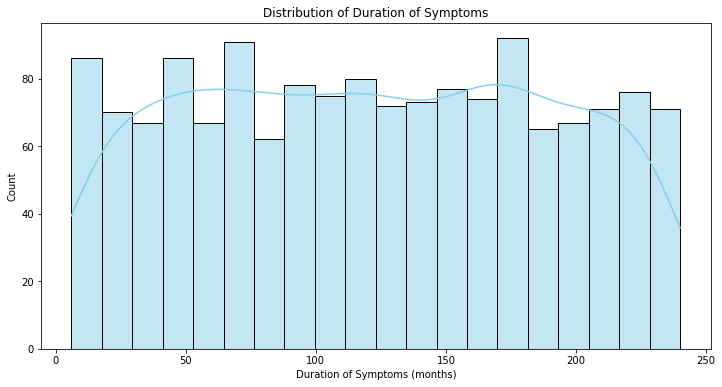

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(ocd_df['Duration of Symptoms (months)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Duration of Symptoms')
plt.xlabel('Duration of Symptoms (months)')
plt.show()

there is no significant concentration of patients within a specific duration range, and the distribution is more uniform.
<br><br>
Are there outliers or specific cases that deviate from the general trend

### Medication Distribution

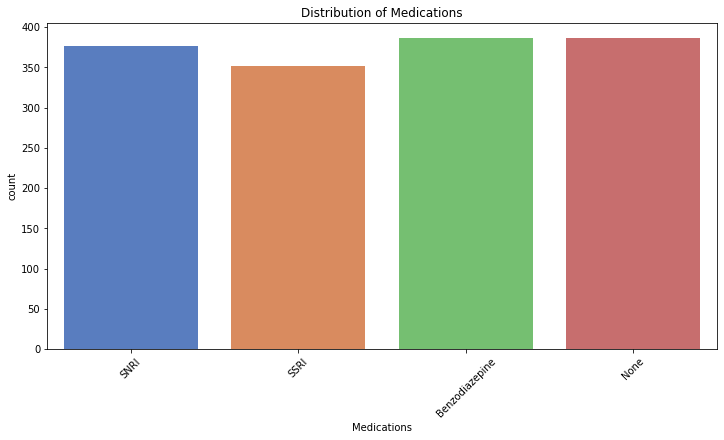

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Medications', data=ocd_df, palette='muted')
plt.title('Distribution of Medications')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Age statistics of medications
grouped_by_medication = ocd_df.groupby('Medications')['Age'].describe()
grouped_by_medication

,count,mean,std,min,25%,50%,75%,max
Medications,,,,,,,,
Benzodiazepine,386.0,46.476684,16.251297,18.0,33.0,47.0,59.0,75.0
None,386.0,47.129534,16.674385,18.0,32.0,47.5,61.0,75.0
SNRI,376.0,46.279255,17.260952,18.0,31.0,46.5,61.0,75.0
SSRI,352.0,47.269886,17.204432,18.0,32.0,48.5,62.0,75.0


In [11]:
# Grouped duration .describe()

bins = [0, 50, 100, 150, 200, float('inf')]

ocd_df['Duration Group'] = pd.cut(ocd_df['Duration of Symptoms (months)'],
                                  bins=bins, labels=['0-50', '51-100', '101-150', '151-200', '200+'])

grouped_by_duration = ocd_df.groupby('Duration Group')['Duration of Symptoms (months)'].describe()

grouped_by_duration

,count,mean,std,min,25%,50%,75%,max
Duration Group,,,,,,,,
0-50,290.0,27.889655,13.707078,6.0,15.25,27.5,40.0,50.0
51-100,323.0,75.167183,14.375939,51.0,64.00,75.0,88.0,100.0
101-150,313.0,124.584665,13.980069,101.0,113.00,125.0,136.0,150.0
151-200,331.0,174.489426,14.080581,151.0,163.50,174.0,187.0,200.0
200+,243.0,220.164609,11.284344,201.0,210.00,220.0,230.0,240.0


In [12]:
# Age and Sympton Duration Statistics Grouped by Duration and Medication

ocd_df['Age'] = pd.to_numeric(ocd_df['Age'], errors='coerce')
ocd_df['Duration of Symptoms (months)'] = pd.to_numeric(ocd_df['Duration of Symptoms (months)'], errors='coerce')

bins = [0, 50, 100, 150, 200, float('inf')]  # Adjust the bin edges as needed

ocd_df['Duration Group'] = pd.cut(ocd_df['Duration of Symptoms (months)'], bins=bins, labels=['0-50', '51-100', '101-150', '151-200', '200+'])

grouped_by_duration_age = ocd_df.groupby(['Duration Group', 'Medications'])[['Age', 'Duration of Symptoms (months)']].describe()

grouped_by_duration_age

Age                                           \
                              count       mean        std   min    25%   50%   
Duration Group Medications                                                     
0-50           Benzodiazepine  74.0  49.108108  16.283926  20.0  34.00  49.5   
               None            82.0  45.682927  16.801586  18.0  30.25  43.0   
               SNRI            69.0  45.942029  17.497802  18.0  34.00  44.0   
               SSRI            65.0  46.538462  14.644834  18.0  37.00  47.0   
51-100         Benzodiazepine  87.0  43.459770  15.825946  18.0  30.50  44.0   
               None            82.0  47.012195  15.575776  19.0  33.00  47.5   
               SNRI            69.0  44.362319  18.633438  18.0  26.00  41.0   
               SSRI            85.0  47.388235  16.664115  18.0  32.00  48.0   
101-150        Benzodiazepine  68.0  47.044118  14.957087  18.0  34.50  48.0   
               None            87.0  43.827586  16.291107  18.0  31.00  42.0   
               SNRI            78.0  49.884615  17.498780  18.0  34.00  53.0   
               SSRI            80.0  48.675000  19.365750  18.0  30.50  52.0   
151-200        Benzodiazepine  94.0  49.723404  17.400658  18.0  35.00  51.0   
               None            81.0  50.790123  16.652114  19.0  38.00  53.0   
               SNRI            81.0  45.802469  15.929077  18.0  33.00  45.0   
               SSRI            75.0  48.520000  17.614767  18.0  32.50  53.0   
200+           Benzodiazepine  63.0  42.095238  15.085471  18.0  30.50  42.0   
               None            54.0  49.333333  17.935945  21.0  32.00  49.5   
               SNRI            79.0  45.177215  16.806409  18.0  29.50  47.0   
               SSRI            47.0  43.680851  17.026969  19.0  30.50  41.0   

                                           Duration of Symptoms (months)  \
                                 75%   max                         count   
Duration Group Medications                                                 
0-50           Benzodiazepine  64.75  75.0                          74.0   
               None            60.00  74.0                          82.0   
               SNRI            59.00  75.0                          69.0   
               SSRI            57.00  74.0                          65.0   
51-100         Benzodiazepine  57.00  75.0                          87.0   
               None            58.75  75.0                          82.0   
               SNRI            63.00  74.0                          69.0   
               SSRI            62.00  74.0                          85.0   
101-150        Benzodiazepine  58.00  75.0                          68.0   
               None            57.00  74.0                          87.0   
               SNRI            64.00  75.0                          78.0   
               SSRI            67.00  75.0                          80.0   
151-200        Benzodiazepine  66.75  75.0                          94.0   
               None            66.00  75.0                          81.0   
               SNRI            59.00  75.0                          81.0   
               SSRI            63.00  75.0                          75.0   
200+           Benzodiazepine  51.00  73.0                          63.0   
               None            67.00  75.0                          54.0   
               SNRI            58.50  74.0                          79.0   
               SSRI            58.00  74.0                          47.0   

                                                                            \
                                     mean        std    min     25%    50%   
Duration Group Medications                                                   
0-50           Benzodiazepine   28.635135  14.331280    6.0   15.50   30.5   
               None             26.963415  13.266913    6.0   15.00   26.5   
               SNRI             25.753623  13.920368

### Gender and Marital Status

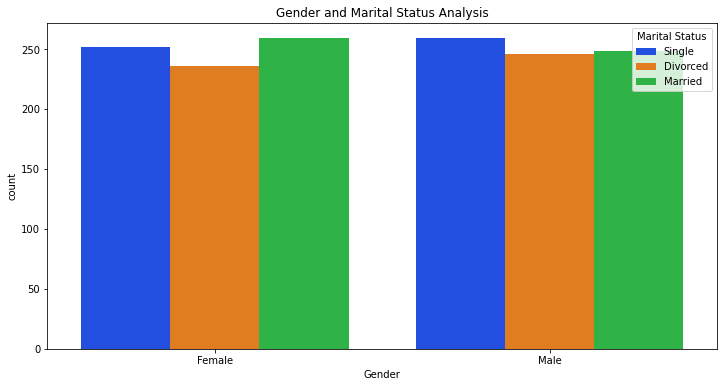

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='Marital Status', data=ocd_df, palette='bright')
plt.title('Gender and Marital Status Analysis')
plt.show()

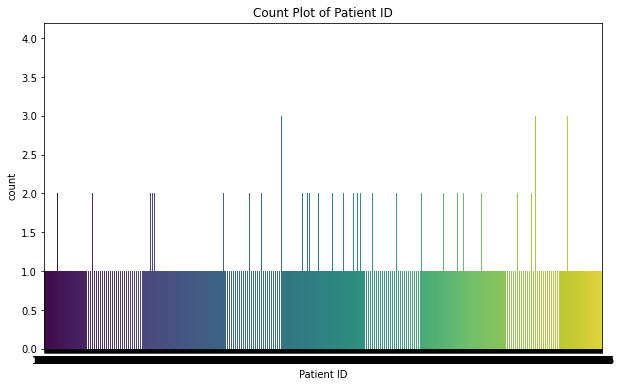

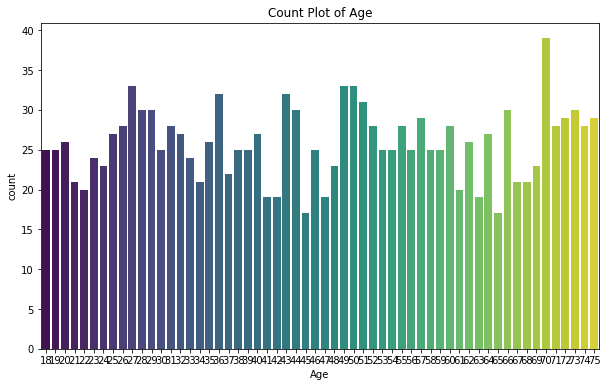

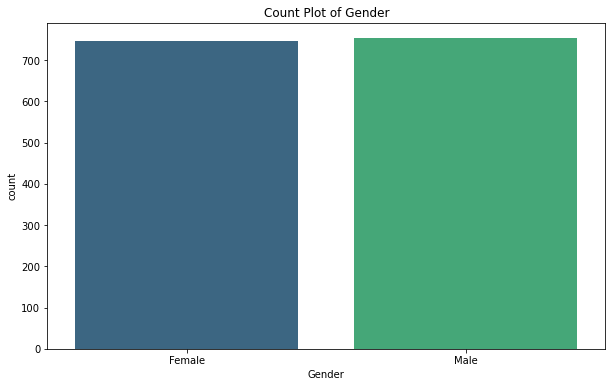

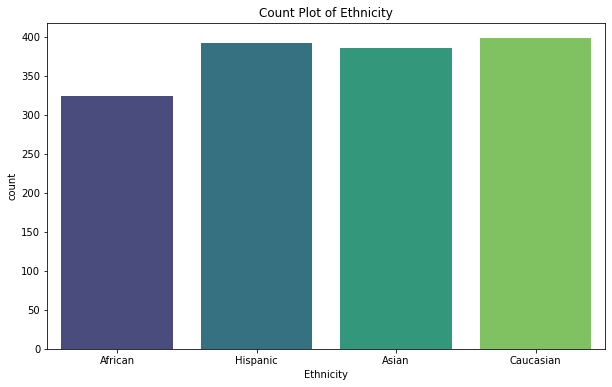

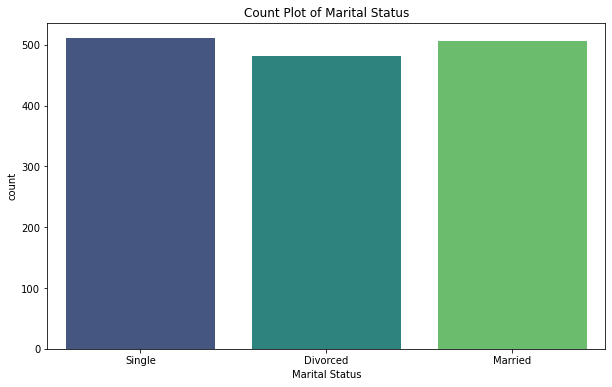

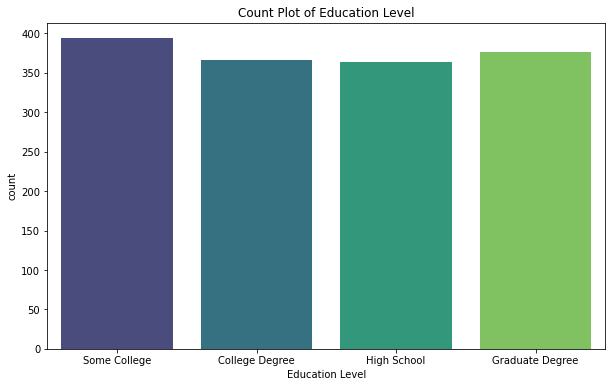

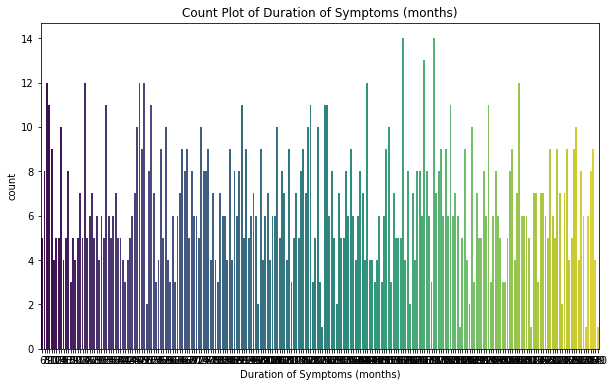

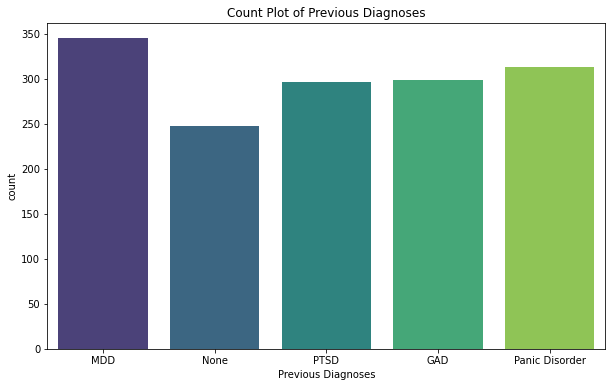

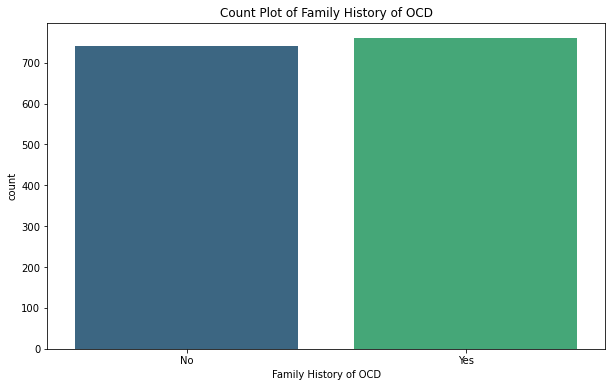

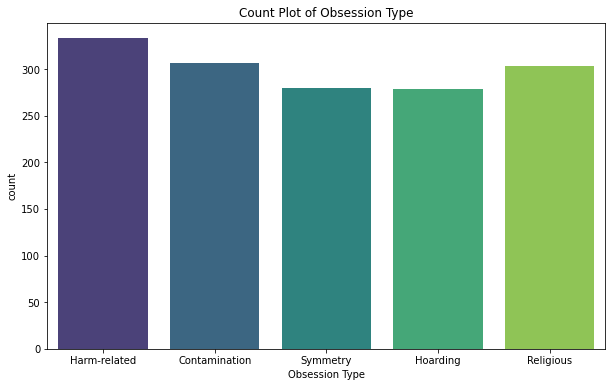

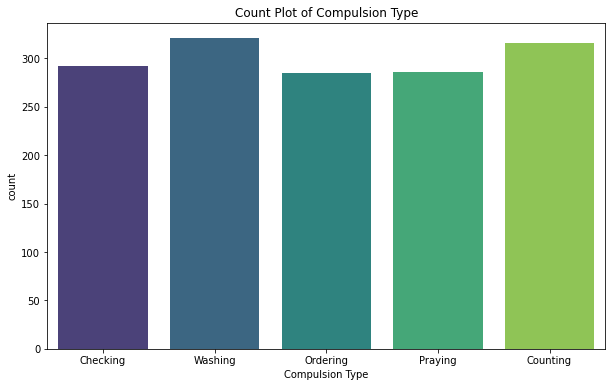

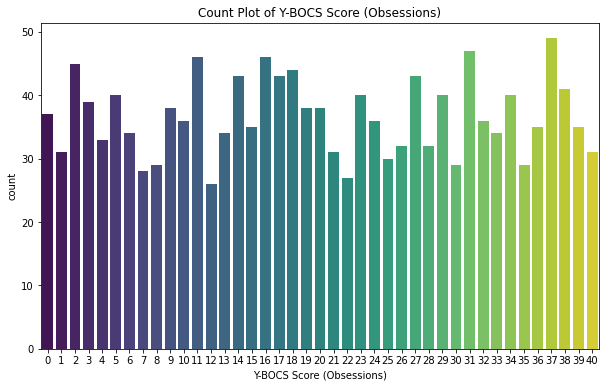

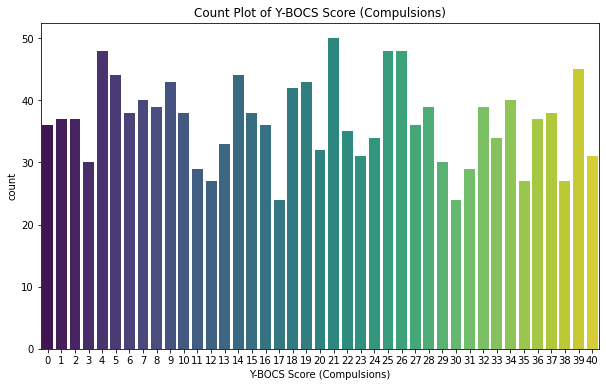

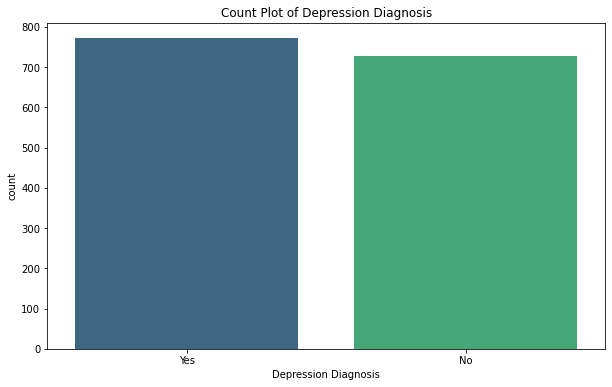

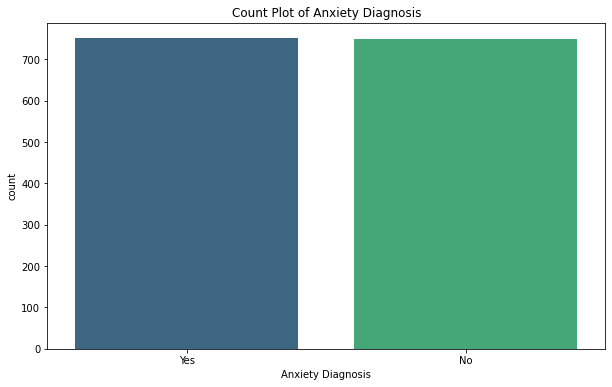

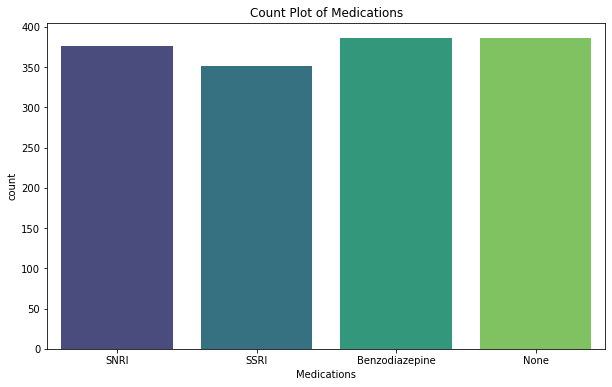

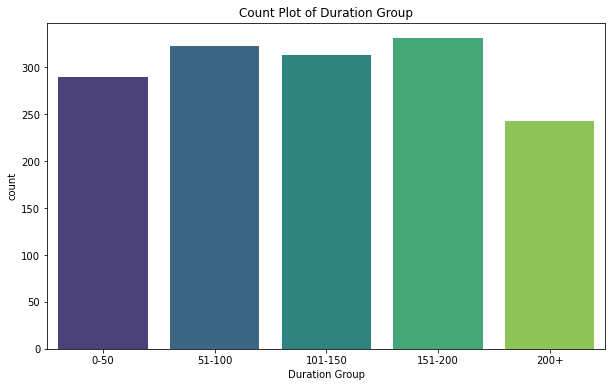

In [21]:
categorical_columns = ocd_df.columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=ocd_df, palette='viridis')
    plt.title(f'Count Plot of {column}')
    plt.show()